In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import statistics 

In [2]:
application_data = pd.read_csv('application_data.csv')
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
previous_application = pd.read_csv('previous_application.csv')
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [6]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

### Removing columns with missing values more than 50%¶
key point
As per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector.

In [7]:
previous_application=previous_application.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       "RATE_INTEREST_PRIVILEGED"],axis=1)

In [8]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

## missing values

#### AMT_ANNUITY

In [9]:
print(previous_application['AMT_ANNUITY'].isnull().sum())

372235


In [10]:
previous_application['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

### Suggestion¶
We can Fill NA with 15955 i.e. Mean for this field

#### AMT_GOODS_PRICE

In [11]:
print(previous_application['AMT_GOODS_PRICE'].isnull().sum())

385515


In [12]:
previous_application['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

### Suggestion¶
We can Fill NA with 112320 i.e. Median for this field

#### NAME_TYPE_SUITE

In [13]:
print(previous_application['NAME_TYPE_SUITE'].isnull().sum())

820405


In [14]:
previous_application['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: count, dtype: int64

### Suggestion¶
We can Fill NA with Unaccompanied i.e. Mode for this field

#### CNT_PAYMENT

In [15]:
print(previous_application['CNT_PAYMENT'].isnull().sum())

372230


In [16]:
previous_application['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

### Suggestion¶
We can Fill NA with 12 i.e. Median for this field

#### DAYS_FIRST_DRAWING

In [17]:
print(previous_application['DAYS_FIRST_DRAWING'].isnull().sum())

673065


In [18]:
previous_application['DAYS_FIRST_DRAWING'].describe()

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

#### Suggestion
We can Fill NA with 365243 i.e. Median for this field

#### DAYS_FIRST_DUE

In [19]:
print(previous_application['DAYS_FIRST_DUE'].isnull().sum())

673065


In [20]:
previous_application['DAYS_FIRST_DUE'].describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

#### Suggestion
We can Fill NA with -831 i.e. Median for this field

### DAYS_LAST_DUE_1ST_VERSION

In [21]:
print(previous_application['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum())

673065


In [22]:
previous_application['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

#### Suggestion¶
We can Fill NA with -361 i.e. Median for this field

#### DAYS_LAST_DUE

In [23]:
print(previous_application['DAYS_LAST_DUE'].isnull().sum())

673065


In [24]:
previous_application['DAYS_LAST_DUE'].describe()

count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64

### Suggestion¶
We can Fill NA with -537 i.e. Median for this field

#### DAYS_TERMINATION

In [25]:
print(previous_application['DAYS_TERMINATION'].isnull().sum())

673065


In [26]:
previous_application['DAYS_TERMINATION'].describe()

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

### Suggestion¶
We can Fill NA with -499 i.e. Median for this field

#### NFLAG_INSURED_ON_APPROVAL

In [27]:
print(previous_application['NFLAG_INSURED_ON_APPROVAL'].isnull().sum())

673065


In [28]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].value_counts()

NFLAG_INSURED_ON_APPROVAL
0.0    665527
1.0    331622
Name: count, dtype: int64

### Suggestion¶
We can Fill NA with 0 i.e. Mode for this field

#### AMT_CREDIT

In [29]:
print(previous_application['AMT_CREDIT'].isnull().sum())

1


In [30]:
previous_application['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

### Suggestion¶
We can Fill NA with 80541 i.e. Median for this field

### PRODUCT_COMBINATION

In [31]:
print(previous_application['PRODUCT_COMBINATION'].isnull().sum())

346


In [32]:
previous_application['PRODUCT_COMBINATION'].value_counts()

PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: count, dtype: int64

### Suggestion
We can Fill NA with Cash i.e. Mode for this field

## Separating numerical and categorical columns 

In [33]:
obj_dtypes = [i for i in previous_application.select_dtypes(include=object).columns if i not in ["type"] ]
num_dtypes = [i for i in previous_application.select_dtypes(include=np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

In [34]:
print("obj_dtypes", "\n")
for x in range(len(obj_dtypes)): 
    print(obj_dtypes[x])

obj_dtypes 

NAME_CONTRACT_TYPE
WEEKDAY_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION


In [35]:
print("num_dtypes", "\n")
for x in range(len(num_dtypes)): 
    print(num_dtypes[x])

num_dtypes 

SK_ID_PREV
AMT_ANNUITY
AMT_APPLICATION
AMT_CREDIT
AMT_GOODS_PRICE
HOUR_APPR_PROCESS_START
NFLAG_LAST_APPL_IN_DAY
DAYS_DECISION
SELLERPLACE_AREA
CNT_PAYMENT
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
NFLAG_INSURED_ON_APPROVAL


## Missing values in application_data

In [36]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

#### Removing columns with missing values more than 40%¶
As per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector.

In [37]:
application_data=application_data.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)

In [38]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [39]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 70, dtype: float64

### missing values

In [40]:
print(application_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())

41519


In [41]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

#### Suggestion¶
We can Fill NA with 0 i.e. Median for this field

In [42]:
print(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum())

41519


In [43]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

#### Suggestion
We can Fill NA with 0 i.e. Median for this field

In [44]:
print(application_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())

41519


In [45]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

#### Suggestion
We can Fill NA with 0 i.e. Median for this field

In [46]:
print(application_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum())

41519


In [47]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

#### Suggestion
We can Fill NA with 0 i.e. Median for this field

In [48]:
print(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())

41519


In [49]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

#### Suggestion
We can Fill NA with 0 i.e. Median for this field

In [50]:
print(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())

41519


In [51]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

#### Suggestion
We can Fill NA with 0 i.e. Median for this field

In [52]:
print(application_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

1021


In [53]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

#### Suggestion¶
We can Fill NA with 0 i.e. Median for this field

In [54]:
print(application_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

1021


In [55]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

#### Suggestion¶
We can Fill NA with 0 i.e. Median for this field

In [56]:
print(application_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

1021


In [57]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

#### Suggestion¶
We can Fill NA with 0 i.e. Median for this field

In [58]:
print(application_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

1021


In [59]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

#### Suggestion¶
We can Fill NA with 0 i.e. Median for this field

In [60]:
application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 70, dtype: int64

In [61]:
print(application_data['AMT_ANNUITY'].isnull().sum())

12


In [62]:
application_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

#### Suggestion
We can Fill NA with 0 

In [63]:
print(application_data['AMT_GOODS_PRICE'].isnull().sum())

278


In [64]:
application_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

#### Suggestion¶
We can Fill NA with 0

In [65]:
print(application_data['NAME_TYPE_SUITE'].isnull().sum())

1292


In [66]:
application_data['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

#### Suggestion¶
We can Fill NA with "Unaccompanied" i.e. Mode for this field

In [67]:
print(application_data['CNT_FAM_MEMBERS'].isnull().sum())

2


In [68]:
application_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

#### Suggestion¶
We can Fill NA with 2 i.e. Median for this field, Mean is not be used as this field needs to be Whole number



In [69]:
print(application_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum())

1


In [70]:
application_data['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [71]:
statistics.mode(application_data['DAYS_LAST_PHONE_CHANGE'])

0.0

#### Suggestion¶
We can Fill NA with 0 i.e. Mode for this field

In [72]:
print(type(application_data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### Converting negative values to absolute values

In [73]:
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_LAST_PHONE_CHANGE'] = abs(application_data['DAYS_LAST_PHONE_CHANGE'])

In [74]:
display(application_data.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Separating numerical and categorical in application_data

In [75]:
obj_dtypes = [i for i in application_data.select_dtypes(include=object).columns if i not in ["type"] ]
num_dtypes = [i for i in application_data.select_dtypes(include=np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

In [76]:
print('Categorical Columns', "\n")
for x in range(len(obj_dtypes)): 
    print(obj_dtypes[x])

Categorical Columns 

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE


In [77]:
print("Numerical Columns","\n")
for x in range(len(num_dtypes)): 
    print(num_dtypes[x])

Numerical Columns 

CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU

## Graph interpretation

### Imbalance percentage

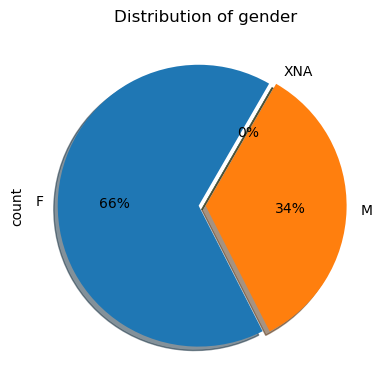

In [78]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
application_data["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",startangle = 60, explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()

### Point to infer from the graph¶
It's non balanced data

## Distribution of Target variable

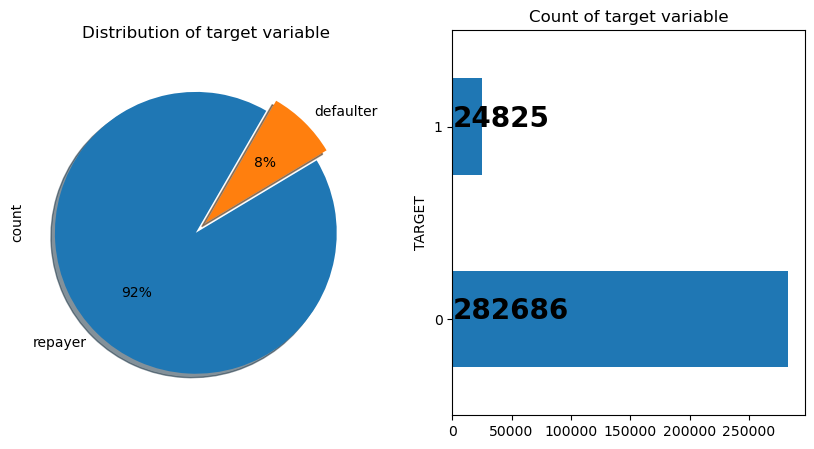

In [79]:
plt.figure(figsize=(10,5))
plt.subplot(121)
application_data["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",startangle = 60,labels=["repayer","defaulter"],explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = application_data["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(application_data["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()

#### Point to infer from the graph¶
8% out of total client population have difficulties in repaying loans.

## Concatenating application_data and previous_application

In [80]:
application_data_x = application_data[[x for x in application_data.columns if x not in ["TARGET"]]]
previous_application_x = previous_application[[x for x in previous_application.columns if x not in ["TARGET"]]]
application_data_x["type"] = "application_data"
previous_application_x["type"] = "previous_application"
data = pd.concat([application_data_x,previous_application_x],axis=0)

## Gender Distribution in application_data

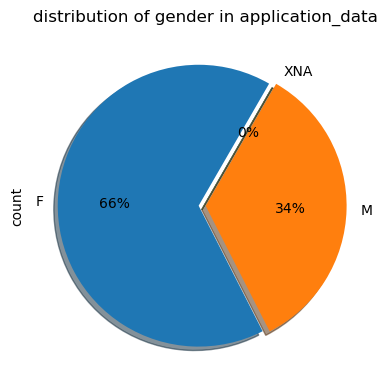

In [81]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
data[data["type"] == "application_data"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",startangle = 60,explode=[.05,0,0],shadow =True)
plt.title("distribution of gender in application_data")
plt.show()

### Point to infer from the graph¶
Female : 66%

Male : 34%

## Distribution of Contract type by gender

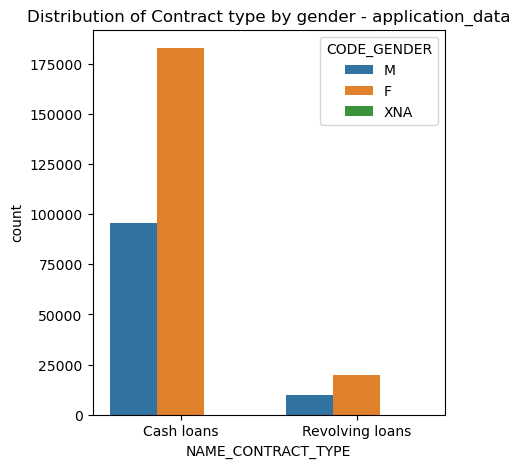

In [82]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
ax = sns.countplot(x="NAME_CONTRACT_TYPE", hue="CODE_GENDER", data=data[data["type"] == "application_data"])
ax.set_title("Distribution of Contract type by gender - application_data")
plt.show()

#### Point to infer from the graph¶
Cash loans is always prefered over Revolving loans by both genders

## Distribution of client owning a car and by gender

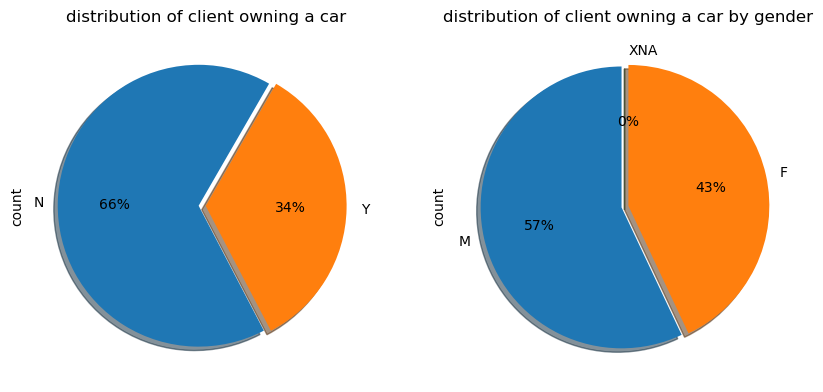

In [83]:
fig = plt.figure(figsize=(10,5))

plt.subplot(121)
data["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",startangle = 60,explode=[.05,0],shadow =True)
plt.title("distribution of client owning a car")

plt.subplot(122)
data[data["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",startangle = 90,explode=[.05,0,0],shadow =True)
plt.title("distribution of client owning a car by gender")

plt.show()

#### Point to infer from the graph¶
SUBPLOT 1 : Distribution of client owning a car. 34% of clients own a car .

SUBPLOT 2 : Distribution of client owning a car by gender. Out of total clients who own car 57% are male and 43% are female.

## Distribution of client owning a house or flat and by gender

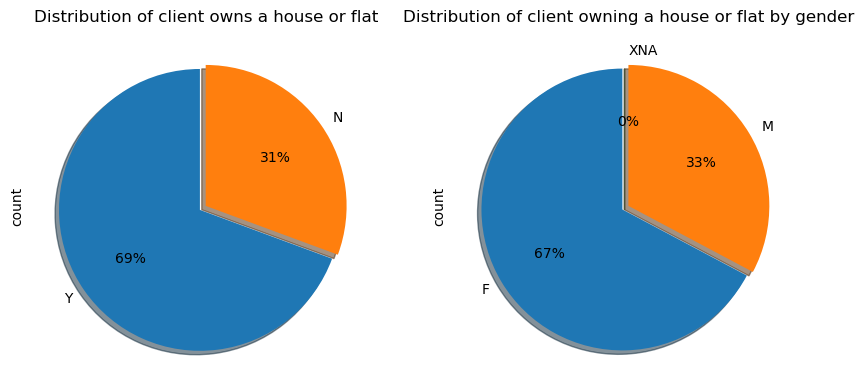

In [84]:
plt.figure(figsize=(10,5))
plt.subplot(121)
data["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",startangle = 90,explode=[0.05,0],shadow =True)
plt.title("Distribution of client owns a house or flat")

plt.subplot(122)
data[data["FLAG_OWN_REALTY"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",startangle = 90,explode=[.05,0,0],shadow =True)
plt.title("Distribution of client owning a house or flat by gender")
plt.show()

#### Point to infer from the graph¶
SUBPLOT 1 : Distribution of client owning a house or flat . 69% of clients own a flat or house .

SUBPLOT 2 : Distribution of client owning a house or flat by gender . Out of total clients who own house 67% are female and 33% are male.

## Comparing summary statistics between defaulters and non - defaulters for loan amounts.

In [85]:
import itertools

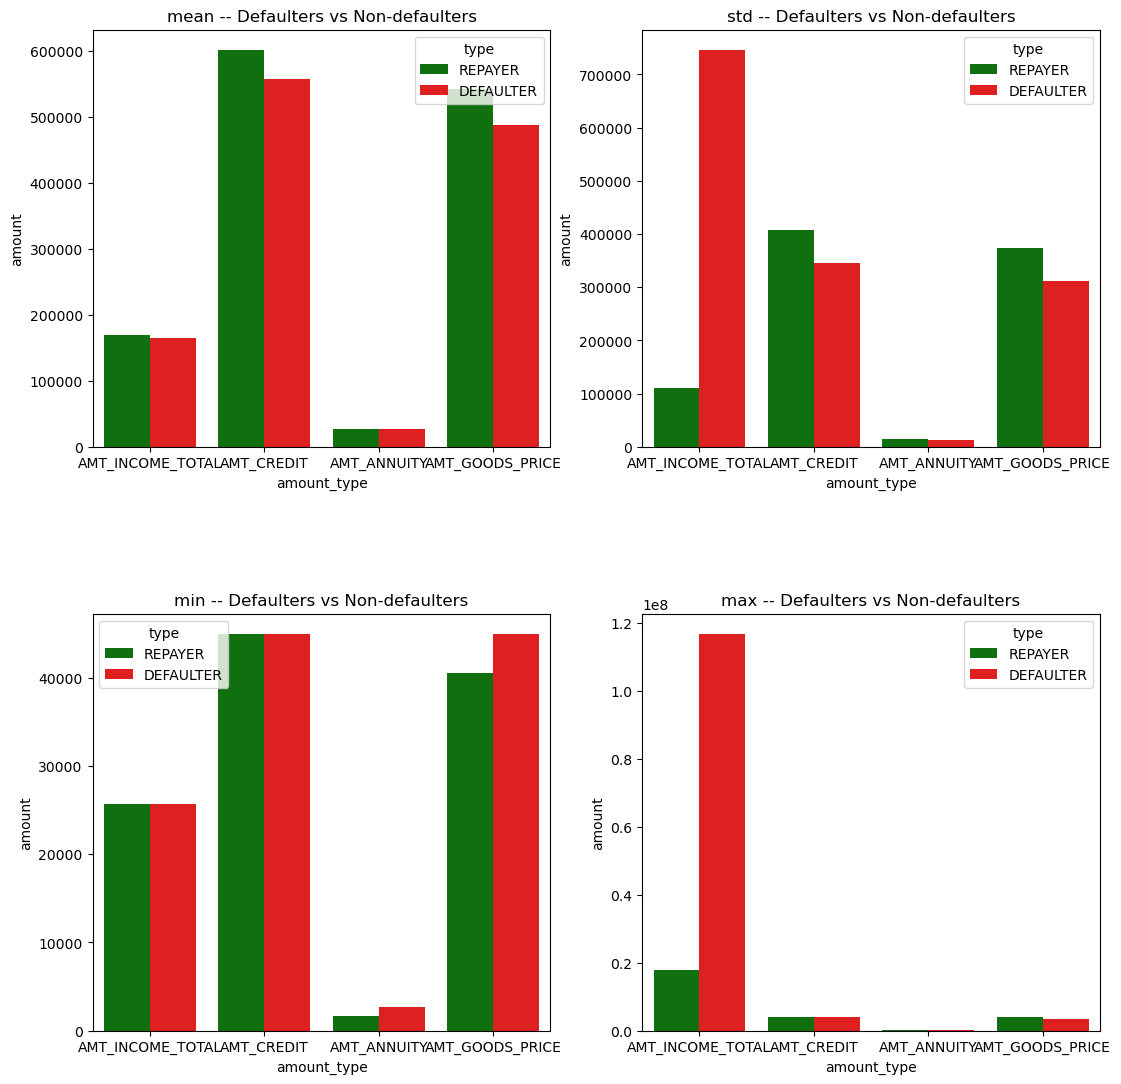

In [86]:
cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
df = application_data.groupby("TARGET")[cols].describe().transpose().reset_index()
df = df[df["level_1"].isin(['mean', 'std', 'min', 'max'])]
df_x = df[["level_0", "level_1", 0]]
df_y = df[["level_0", "level_1", 1]]
df_x = df_x.rename(columns={'level_0': "amount_type", 'level_1': "statistic", 0: "amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={'level_0': "amount_type", 'level_1': "statistic", 1: "amount"})
df_y["type"] = "DEFAULTER"
df_new = pd.concat([df_x, df_y], axis=0)

stat = df_new["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(13,13))

for i, j in itertools.zip_longest(stat, range(length)):
    plt.subplot(2, 2, j + 1)
    fig = sns.barplot(x="amount_type", y="amount", hue="type",
                      data=df_new[df_new["statistic"] == i], palette=["g", "r"])
    plt.title(i + " -- Defaulters vs Non-defaulters")
    plt.subplots_adjust(hspace=.4)
plt.show()

### Point to infer from the graph¶
refer ppt for inference

## Average Income,credit,annuity & goods_price by gender

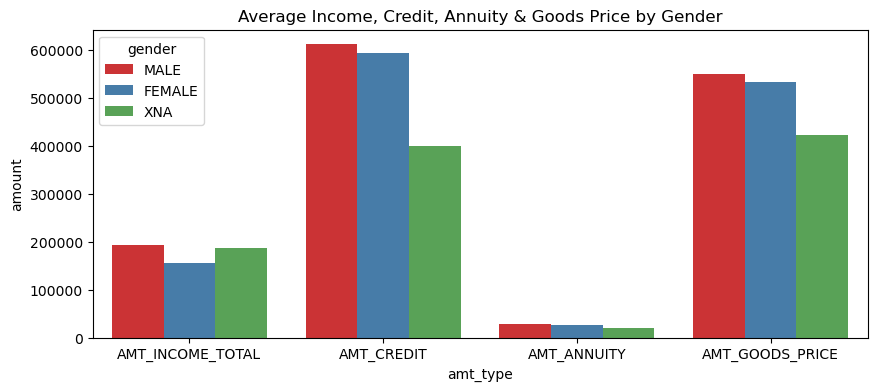

In [87]:
df1 = data.groupby("CODE_GENDER")[cols].mean().transpose().reset_index()

df_f = df1[["index", "F"]]
df_f = df_f.rename(columns={'index': "amt_type", 'F': "amount"})
df_f["gender"] = "FEMALE"

df_m = df1[["index", "M"]]
df_m = df_m.rename(columns={'index': "amt_type", 'M': "amount"})
df_m["gender"] = "MALE"

df_xna = df1[["index", "XNA"]]
df_xna = df_xna.rename(columns={'index': "amt_type", 'XNA': "amount"})
df_xna["gender"] = "XNA"

df_gen = pd.concat([df_m, df_f, df_xna], axis=0)

plt.figure(figsize=(10, 4))
ax = sns.barplot(x="amt_type", y="amount", data=df_gen, hue="gender", palette="Set1")
plt.title("Average Income, Credit, Annuity & Goods Price by Gender")
plt.show()

## Distribution of Education type by loan repayment status

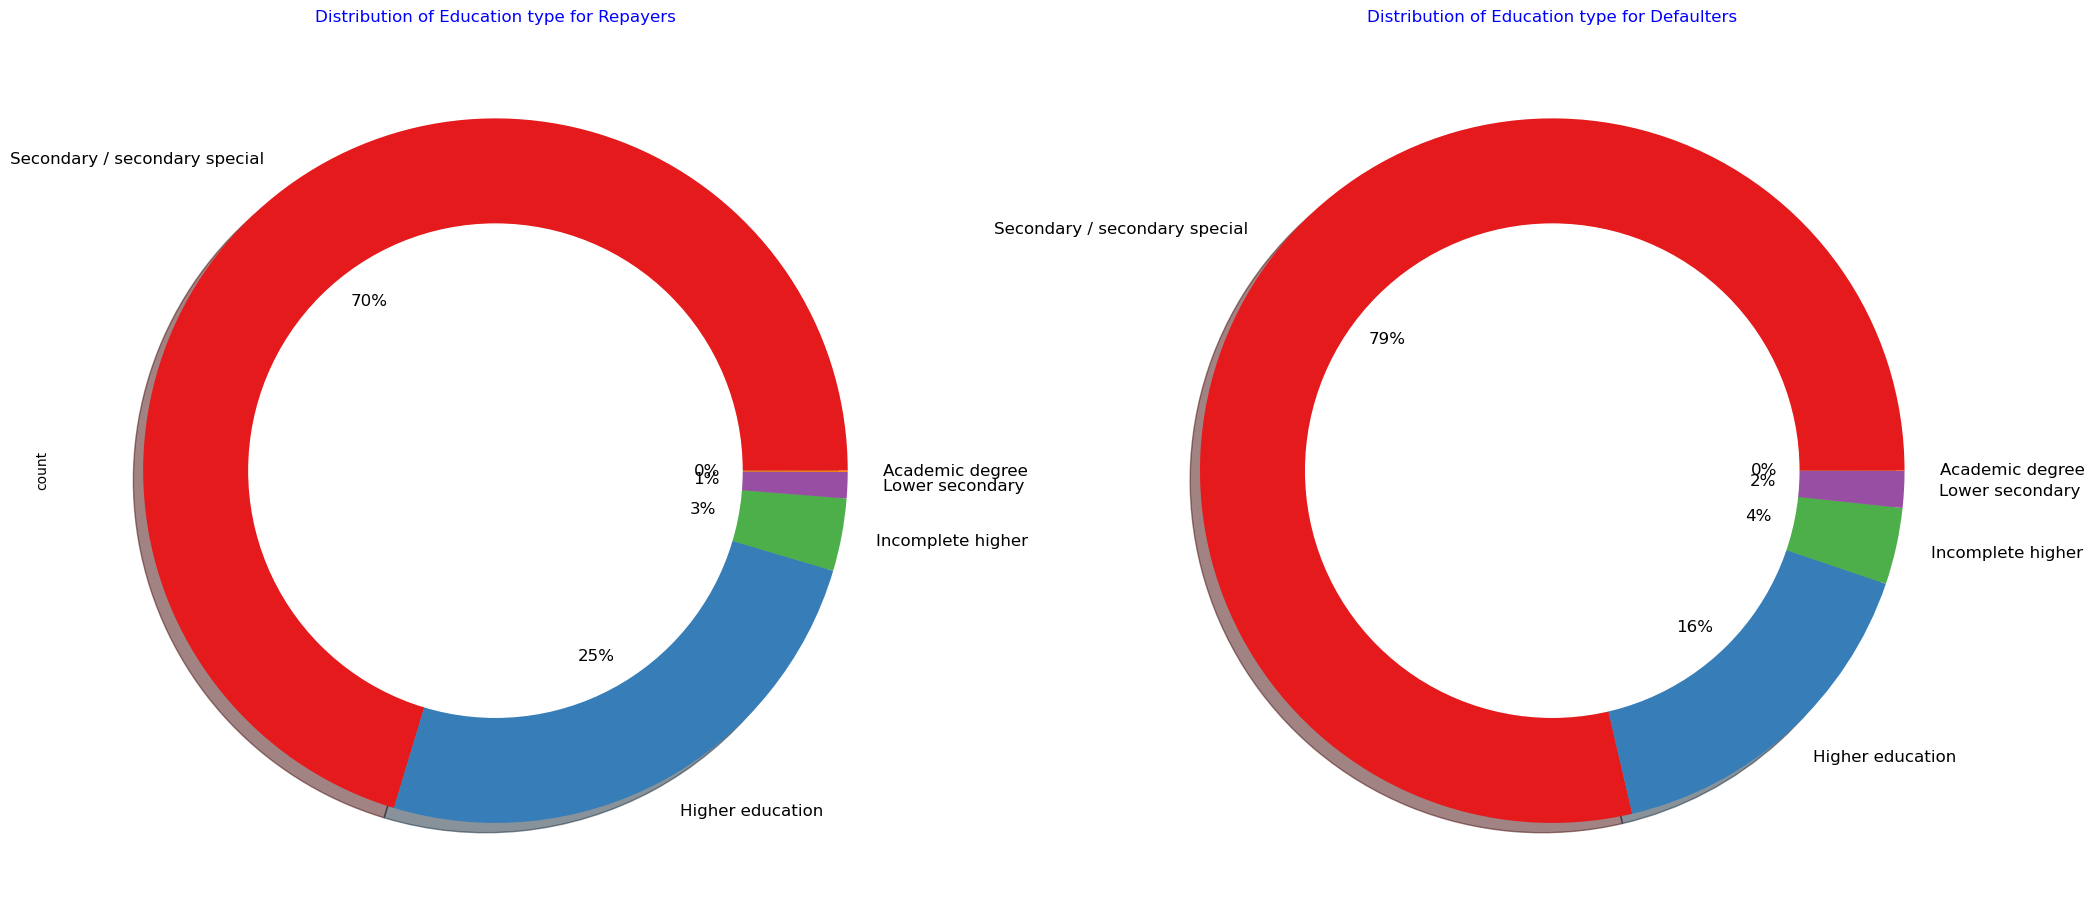

In [88]:
plt.figure(figsize=(25,25))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                colors = sns.color_palette("Set1"),shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Repayers",color="b")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Defaulters",color="b")
plt.ylabel("")
plt.show()

#### Point to infer from the graph¶
Clients who default have proportionally 9% less higher education compared to clients who do not default.

## Average Earnings by different professions and education types

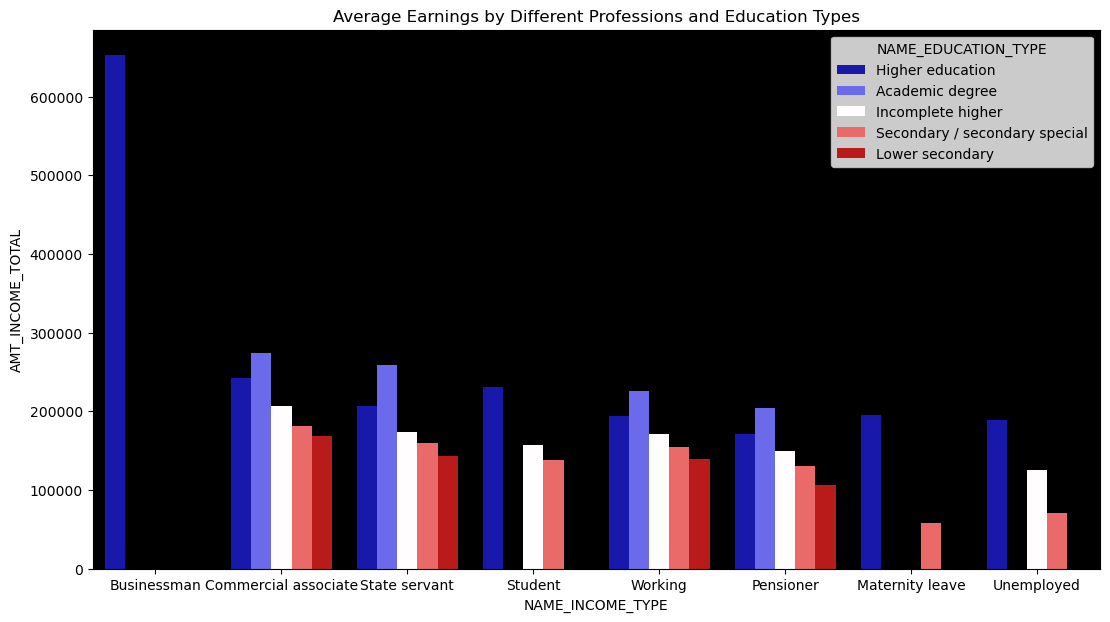

In [89]:
edu = data.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL', ascending=False)

fig = plt.figure(figsize=(13, 7))
ax = sns.barplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', data=edu, hue='NAME_EDUCATION_TYPE', palette="seismic")
ax.set_facecolor("k")
plt.title("Average Earnings by Different Professions and Education Types")
plt.show()

### Distribution of Education type by loan repayment status

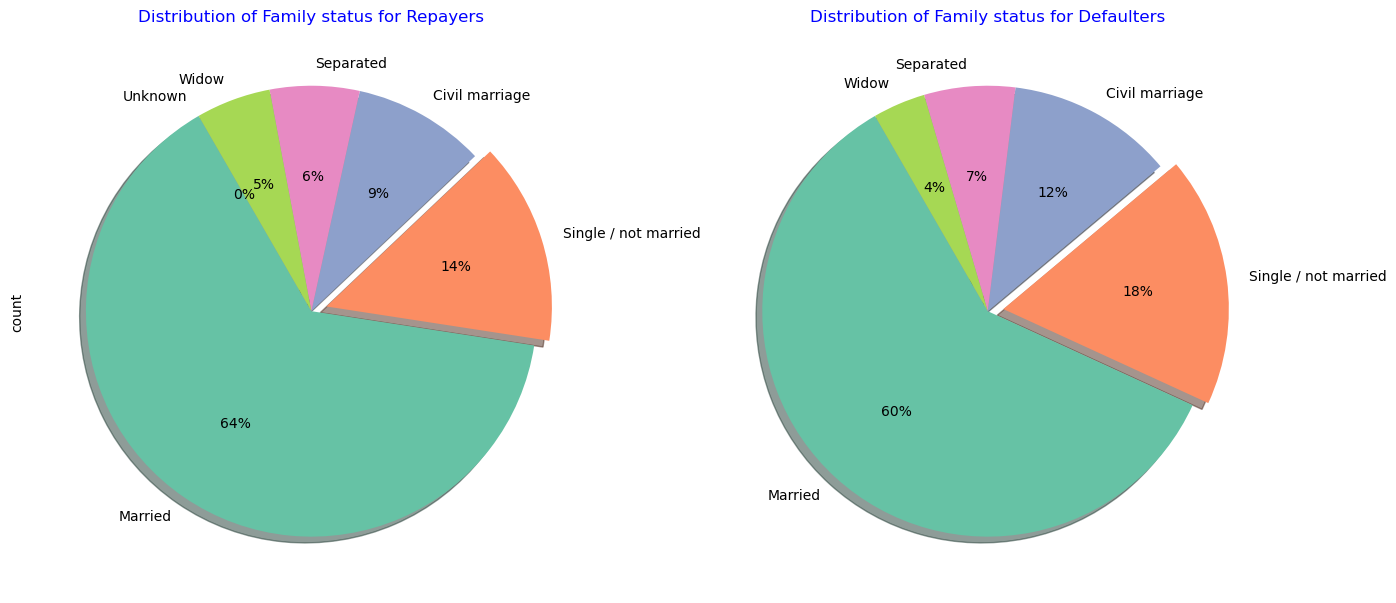

In [90]:
plt.figure(figsize=(16,8))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                             startangle=120,colors = sns.color_palette("Set2",7),
                                              shadow =True,explode=[0,.07,0,0,0,0])
plt.title("Distribution of Family status for Repayers",color="b")
plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                    startangle=120,colors = sns.color_palette("Set2",7),
                                             shadow =True,explode=[0,.07,0,0,0])
plt.title("Distribution of Family status for Defaulters",color="b")
plt.ylabel("")
plt.show()

#### Point to infer from the graph¶
Percentage of single people are more in defaulters than non defaulters.

## Current loan id having previous loan applications.

<Figure size 1300x700 with 0 Axes>

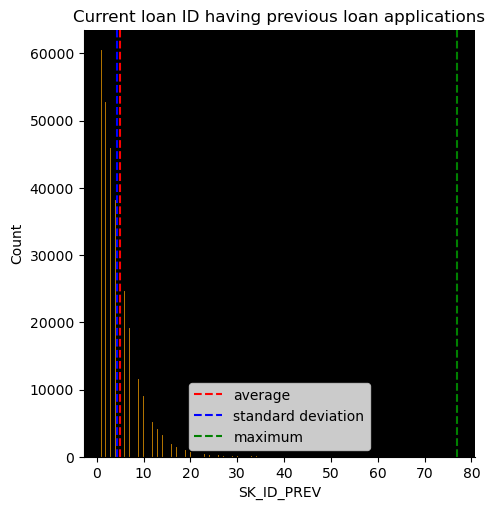

In [91]:
x = previous_application.groupby("SK_ID_CURR")["SK_ID_PREV"].count().reset_index()
plt.figure(figsize=(13, 7))
ax = sns.displot(x["SK_ID_PREV"], color="orange")
g = ax.axes[0, 0]
g.axvline(x["SK_ID_PREV"].mean(), linestyle="dashed", color="r", label="average")
g.axvline(x["SK_ID_PREV"].std(), linestyle="dashed", color="b", label="standard deviation")
g.axvline(x["SK_ID_PREV"].max(), linestyle="dashed", color="g", label="maximum")
g.legend(loc="best")
g.set_title("Current loan ID having previous loan applications")
g.set_facecolor("k")
plt.show()

## Point to infer from the graph¶
On average current loan ids have 4 to 5 loan applications previously

## Total and average amounts applied and credited in previous applications

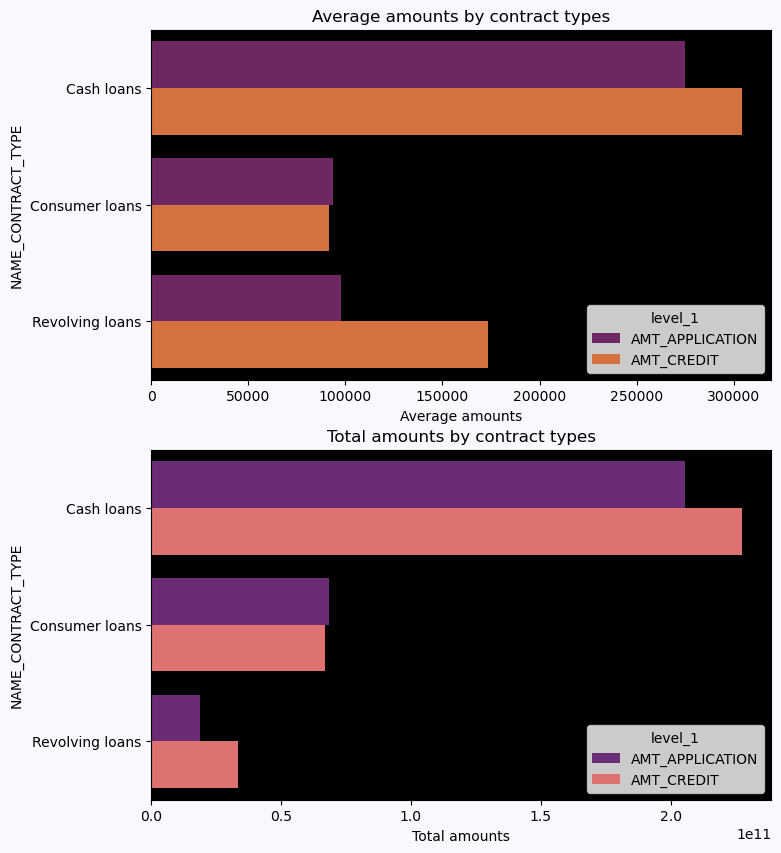

In [92]:
mn = previous_application.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION", "AMT_CREDIT"]].mean().stack().reset_index()
tt = previous_application.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION", "AMT_CREDIT"]].sum().stack().reset_index()
fig = plt.figure(figsize=(8,10))
fig.set_facecolor("ghostwhite")
plt.subplot(211)
ax = sns.barplot(x=0, y="NAME_CONTRACT_TYPE", data=mn[:6], hue="level_1", palette="inferno")
ax.set_facecolor("k")
ax.set_xlabel("Average amounts")
ax.set_title("Average amounts by contract types")
plt.subplot(212)
ax1 = sns.barplot(x=0, y="NAME_CONTRACT_TYPE", data=tt[:6], hue="level_1", palette="magma")
ax1.set_facecolor("k")
ax1.set_xlabel("Total amounts")
ax1.set_title("Total amounts by contract types")
plt.subplots_adjust(hspace=.2)
plt.show()

# Correlations

### finding corelations between the variables

#### previous application

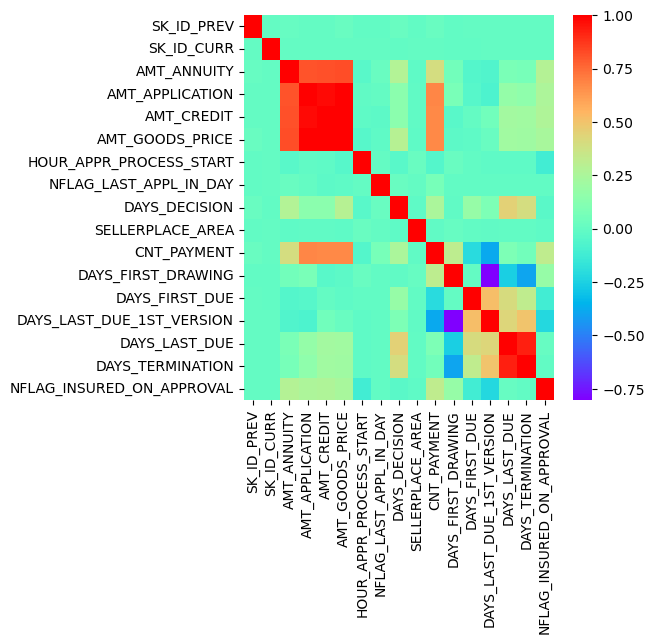

In [93]:
numeric_cols = previous_application.select_dtypes(include=['number'])
corrmat = numeric_cols.corr()
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corrmat, ax=ax, cmap="rainbow")
plt.show()

#### application data

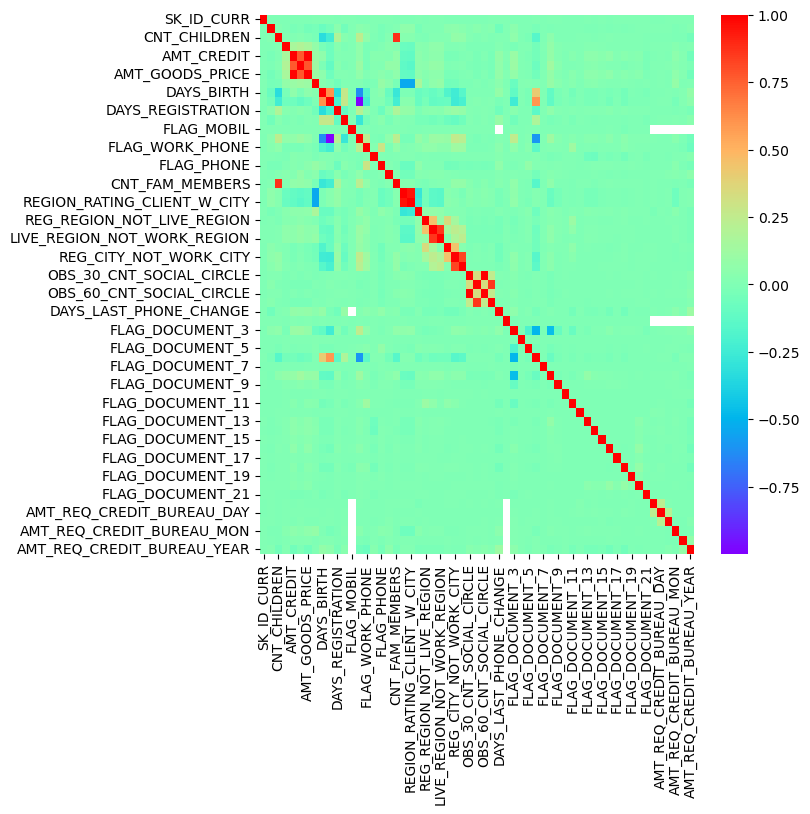

In [94]:
numeric_cols = application_data.select_dtypes(include=['number'])
corrmat = numeric_cols.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, ax=ax, cmap="rainbow")
plt.show()

In [95]:
numeric_cols = previous_application.select_dtypes(include=['number'])
corrmat = numeric_cols.corr()
mask = np.triu(np.ones(corrmat.shape), k=1).astype(bool)
corrdf = corrmat.where(mask)
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset=['Correlation'], inplace=True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
top_correlations = corrdf.sort_values(by='Correlation', ascending=False).head(10)
top_correlations

,Var1,Var2,Correlation
88,AMT_GOODS_PRICE,AMT_APPLICATION,1.00
89,AMT_GOODS_PRICE,AMT_CREDIT,0.99
71,AMT_CREDIT,AMT_APPLICATION,0.98
269,DAYS_TERMINATION,DAYS_LAST_DUE,0.93
87,AMT_GOODS_PRICE,AMT_ANNUITY,0.82
70,AMT_CREDIT,AMT_ANNUITY,0.82
53,AMT_APPLICATION,AMT_ANNUITY,0.81
232,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,0.80
173,CNT_PAYMENT,AMT_APPLICATION,0.68
174,CNT_PAYMENT,AMT_CREDIT,0.67


##### Loan amount variables:

There's a very strong positive correlation between AMT_GOODS_PRICE (loan amount for goods) and AMT_APPLICATION (total loan application amount), with a coefficient of 1.0. This indicates that these two variables are perfectly correlated, meaning they essentially contain the same information.
Similarly, AMT_CREDIT (credit amount) has very strong positive correlations with both AMT_GOODS_PRICE (0.996) and AMT_APPLICATION (0.996). This suggests that borrowers tend to apply for a total loan amount (including goods and credit) that is close to their credit limit.

##### Loan termination and due dates:

A very strong positive correlation exists between DAYS_TERMINATION (days until loan termination) and DAYS_LAST_DUE (days until last due date), with a coefficient of 1.0. This indicates that these variables likely represent the same underlying concept.

##### Loan amount and annuity:

There are moderately strong positive correlations between loan amount variables (AMT_GOODS_PRICE, AMT_CREDIT, and AMT_APPLICATION) and AMT_ANNUITY (loan annuity), with coefficients ranging from 0.81 to 0.83. This suggests that borrowers with higher loan amounts tend to have higher annuity payments.

##### Weaker correlations:

The correlation between DAYS_LAST_DUE_1ST_VERSION (days until last due date in the first version) and DAYS_FIRST_DRAWING (days until first loan disbursement) is 0.80, which indicates a moderately strong positive relationship.
The correlations between CNT_PAYMENT (number of payments) and loan amount variables (AMT_APPLICATION and AMT_CREDIT) are around 0.67, which are weaker positive relationships.

## application data

#### Top 10 Correlation Fields for Repayer

In [96]:
df_repayer = application_data[application_data['TARGET'] == 0]
df_defaulter = application_data[application_data['TARGET'] == 1]

In [97]:
numeric_cols = df_repayer.select_dtypes(include=['number'])
corrmat = numeric_cols.corr()
mask = np.triu(np.ones(corrmat.shape), k=1).astype(bool)
corrdf = corrmat.where(mask)
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset=['Correlation'], inplace=True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
top_correlations = corrdf.sort_values(by='Correlation', ascending=False).head(10)
top_correlations

,Var1,Var2,Correlation
776,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
1798,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
358,AMT_GOODS_PRICE,AMT_CREDIT,0.99
1199,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
1064,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
1858,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
1439,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.86
1619,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.83
359,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
299,AMT_ANNUITY,AMT_CREDIT,0.77


##### High correlation between variables: 
There are several variables in the data set with high correlations. For instance, the correlation between REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT is 0.95, which indicates a strong positive relationship. This suggests that these two variables might be capturing similar information. Similarly, there's a high correlation between DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE (0.86), and between LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION (0.86).


##### Correlation between loan amount and credit history: 
The correlation between AMT_GOODS_PRICE (loan amount for goods) and AMT_CREDIT (credit amount) is 0.99, which is very high. This suggests that borrowers tend to take out larger loans for goods if they have a higher credit limit. There's also a moderate negative correlation between AMT_GOODS_PRICE and AMT_ANNUITY (loan annuity) (-0.52), and a moderate positive correlation between AMT_CREDIT and AMT_ANNUITY (0.98). This could indicate that borrowers with higher loan amounts tend to have lower annuity payments (possibly due to longer loan terms), while those with higher credit limits tend to have higher annuity payments.

##### Social circle information:
The variables OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE seem to capture information about the borrower's social circle within the past 60 and 30 days, respectively. These variables have a correlation of 1.0, which suggests that they might be measuring the same thing.

#### Top 10 Correlation Fields for Defaulter

In [98]:
numeric_cols = df_defaulter.select_dtypes(include=['number'])
corrmat = numeric_cols.corr()
mask = np.triu(np.ones(corrmat.shape), k=1).astype(bool)
corrdf = corrmat.where(mask)
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset=['Correlation'], inplace=True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
top_correlations = corrdf.sort_values(by='Correlation', ascending=False).head(10)
top_correlations

,Var1,Var2,Correlation
1798,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
776,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
358,AMT_GOODS_PRICE,AMT_CREDIT,0.98
1199,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
1064,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
1858,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
1439,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.85
1619,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.78
299,AMT_ANNUITY,AMT_CREDIT,0.75
359,AMT_GOODS_PRICE,AMT_ANNUITY,0.75


##### High correlation between variables: 
There are several variables in the data set with high correlations. For instance, the correlation between REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT is 0.96, which indicates a strong positive relationship. This suggests that these two variables might be capturing similar information. Similarly, there's a high correlation between DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE (0.87), and between LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION (0.85).

##### Correlation between loan amount and credit history: 
The correlation between AMT_GOODS_PRICE (loan amount for goods) and AMT_CREDIT (credit amount) is -0.34, which is a weak negative correlation. This suggests that there is not a very strong relationship between the two variables. However, the correlation between AMT_ANNUITY (loan annuity) and AMT_CREDIT (credit amount) is 0.98, which is a very strong positive correlation. This suggests that borrowers with higher credit limits tend to have higher annuity payments.

##### Social circle information: 
The variables OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE seem to capture information about the borrower's social circle within the past 60 and 30 days, respectively. These variables have a correlation of 1.0, which suggests that they might be measuring the same thing.